# **AI TECH INSTITUTE** · *Intermediate AI & Data Science*
### CLT and Law of Large Numbers — The Mathematical Foundations
**Instructor:** Amir Charkhi  |  **Goal:** Master the two most powerful theorems that make statistics possible.

> Format: short theory → quick practice → build understanding → mini-challenges.


---
## Learning Objectives
- Define and apply the Central Limit Theorem (the foundation of statistical inference)
- Understand the Law of Large Numbers and why sample size matters
- See these theorems work with ANY distribution (exponential, uniform, weird shapes)
- Apply these concepts to real business scenarios
- Avoid the Gambler's Fallacy trap

## 1. The Central Limit Theorem: Statistical Magic
**The most important theorem in statistics**: No matter how weird your data looks, sample means become beautifully normal!

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import math 
import random
import matplotlib.pyplot as plt

# Set style for nice plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
%matplotlib inline

In [2]:
# Central Limit Theorem explained
clt_facts = {
    "🎪 The Magic": "Sample means become normal, regardless of original distribution",
    "📊 What You Need": "Repeated samples of the same size (n ≥ 30 works great)",
    "🔮 The Power": "Works for ANY distribution - exponential, uniform, bimodal, anything!",
    "🎯 The Result": "Mean of sample means = population mean (μ)",
    "📏 The Precision": "Standard error = σ/√n (bigger samples = more precise)",
    "⚡ Why It Matters": "Makes statistical inference possible!"
}

print("🎪 Central Limit Theorem - The Greatest Show in Statistics!")
for key, value in clt_facts.items():
    print(f"   {key}: {value}")
    
print("\n💫 This is why we can make confident conclusions from small samples!")

🎪 Central Limit Theorem - The Greatest Show in Statistics!
   🎪 The Magic: Sample means become normal, regardless of original distribution
   📊 What You Need: Repeated samples of the same size (n ≥ 30 works great)
   🔮 The Power: Works for ANY distribution - exponential, uniform, bimodal, anything!
   🎯 The Result: Mean of sample means = population mean (μ)
   📏 The Precision: Standard error = σ/√n (bigger samples = more precise)
   ⚡ Why It Matters: Makes statistical inference possible!

💫 This is why we can make confident conclusions from small samples!


## 2. CLT Demo: From Exponential Chaos to Normal Beauty

In [3]:
# Create a highly skewed exponential distribution
beta = 2
num_samples = 100000
exp_data = np.random.exponential(scale=beta, size=num_samples)

print(f"📊 Exponential Population (β={beta}):")
print(f"   Population size: {num_samples:,}")
print(f"   Mean: {exp_data.mean():.3f} (theory: {beta})")
print(f"   Variance: {exp_data.var():.3f} (theory: {beta**2})")
print(f"   Shape: Extremely right-skewed!")

📊 Exponential Population (β=2):
   Population size: 100,000
   Mean: 1.992 (theory: 2)
   Variance: 3.975 (theory: 4)
   Shape: Extremely right-skewed!


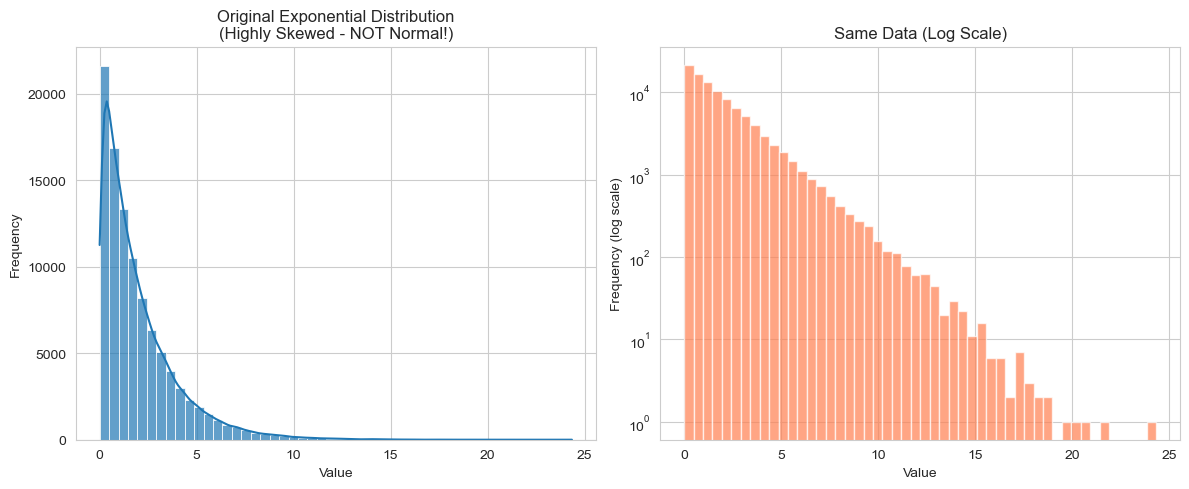

👆 This distribution looks nothing like a normal curve!


In [4]:
# Convert to DataFrame for easier sampling
exponential_data_df = pd.DataFrame(exp_data, columns=["Population Values"])

# Visualize the original distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(exp_data, bins=50, kde=True, alpha=0.7)
plt.title('Original Exponential Distribution\n(Highly Skewed - NOT Normal!)')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(exp_data, bins=50, alpha=0.7, color='coral')
plt.title('Same Data (Log Scale)')
plt.xlabel('Value')
plt.ylabel('Frequency (log scale)')
plt.yscale('log')

plt.tight_layout()
plt.show()

print("👆 This distribution looks nothing like a normal curve!")

### 2.1 The CLT Transformation Function

In [5]:
# Enhanced sampling function
def sample_distribution(n, num_iterations, statistic_type, data):
    """Sample from data and calculate specified statistic"""
    sample_stats = []
    
    for i in range(num_iterations):
        sample_i = data.sample(n, replace=True)
        
        if statistic_type == "mean":
            sample_stat = sample_i.mean().iloc[0]
        elif statistic_type == "median":
            sample_stat = sample_i.median().iloc[0]
        elif statistic_type == "sum":
            sample_stat = sample_i.sum().iloc[0]
        elif statistic_type == "range":
            sample_stat = (sample_i.max() - sample_i.min()).iloc[0]
        
        sample_stats.append(sample_stat)
    
    return np.array(sample_stats)

print("🔧 CLT Testing Function Ready!")
print("   We'll sample from our exponential data and watch the magic happen...")

🔧 CLT Testing Function Ready!
   We'll sample from our exponential data and watch the magic happen...


### 2.2 Sample Size Progression: Watching CLT Emerge

In [6]:
# Test different sample sizes
sample_sizes = [5, 15, 30, 100]
num_iterations = 10000

print(f"🧪 CLT Experiment: {num_iterations:,} samples each")
print("Sample Size | Mean of Means | Std of Means | Looks Normal?")
print("-" * 60)

results = {}
for n in sample_sizes:
    sample_means = sample_distribution(n, num_iterations, "mean", exponential_data_df)
    results[n] = sample_means
    
    mean_of_means = np.mean(sample_means)
    std_of_means = np.std(sample_means, ddof=1)
    
    # Quick normality check
    _, p_value = stats.shapiro(sample_means[:5000])  # Test subset for speed
    looks_normal = "✅ Yes" if p_value > 0.05 else "❌ Not yet"
    
    print(f"    {n:2d}      |     {mean_of_means:5.3f}     |    {std_of_means:5.3f}     | {looks_normal}")

print(f"\n🎯 Notice: All means center around {beta} (the population mean)!")

🧪 CLT Experiment: 10,000 samples each
Sample Size | Mean of Means | Std of Means | Looks Normal?
------------------------------------------------------------
     5      |     1.992     |    0.891     | ❌ Not yet
    15      |     1.988     |    0.512     | ❌ Not yet
    30      |     1.996     |    0.369     | ❌ Not yet
    100      |     1.990     |    0.199     | ❌ Not yet

🎯 Notice: All means center around 2 (the population mean)!


C:\Users\bduong\AppData\Local\Temp\ipykernel_11728\3977680938.py:25: UserWarning: Glyph 127914 (\N{CIRCUS TENT}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\bduong\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127914 (\N{CIRCUS TENT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


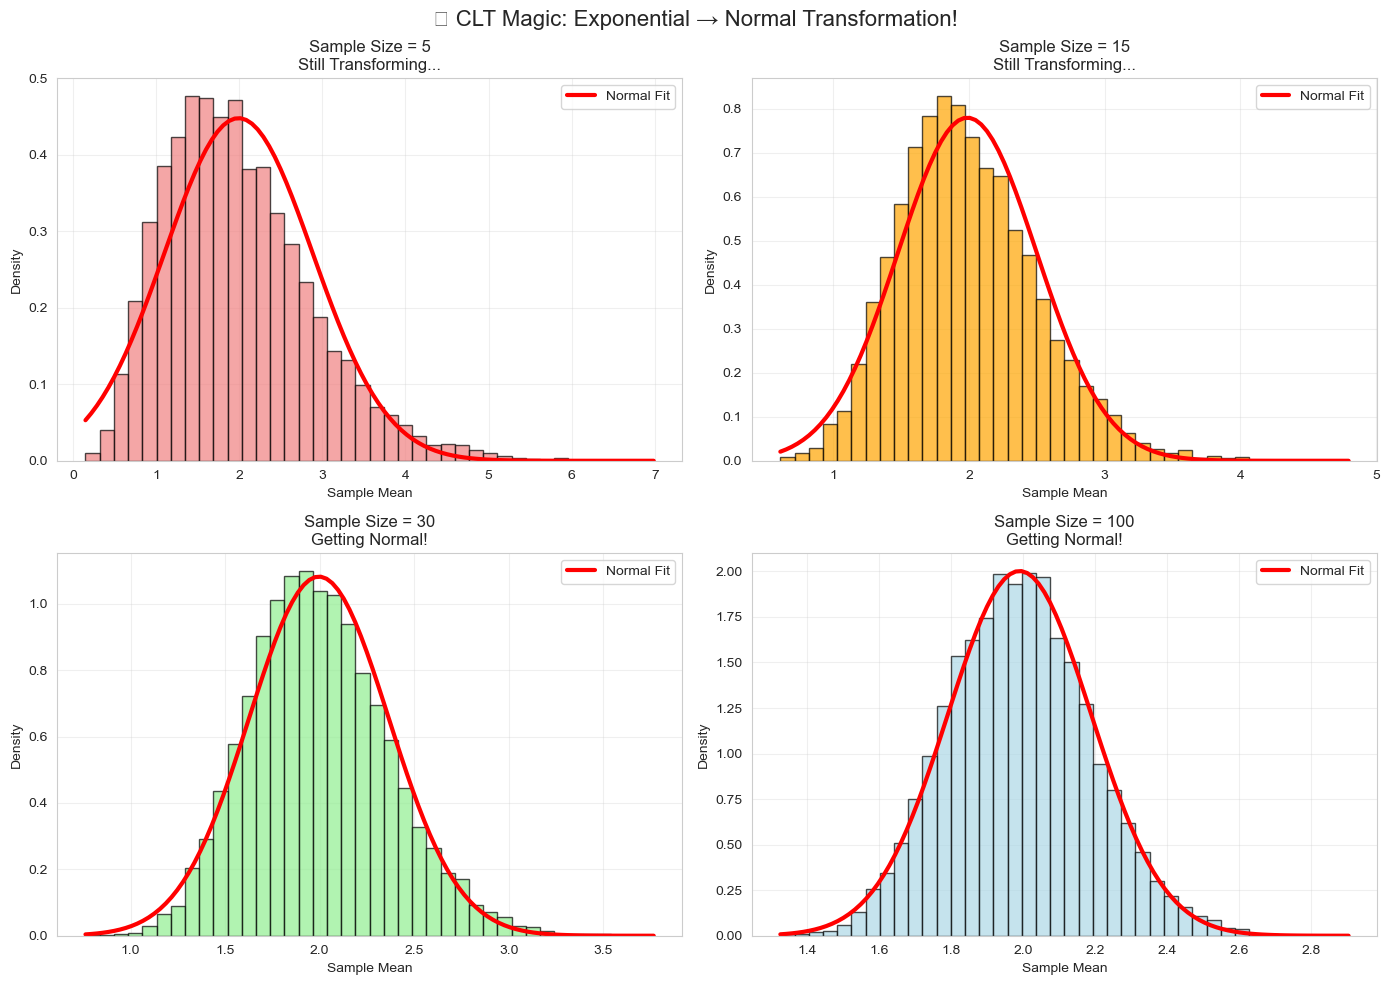

✨ Amazing! By n=30, even the most skewed data produces normal sample means!


In [7]:
# Visualize the CLT transformation
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

colors = ['lightcoral', 'orange', 'lightgreen', 'lightblue']

for i, n in enumerate(sample_sizes):
    sample_means = results[n]
    
    axes[i].hist(sample_means, bins=40, density=True, alpha=0.7, 
                color=colors[i], edgecolor='black')
    
    # Overlay normal distribution
    x = np.linspace(sample_means.min(), sample_means.max(), 100)
    normal_curve = stats.norm.pdf(x, np.mean(sample_means), np.std(sample_means, ddof=1))
    axes[i].plot(x, normal_curve, 'red', linewidth=3, label='Normal Fit')
    
    axes[i].set_title(f'Sample Size = {n}\n{"Getting Normal!" if n >= 30 else "Still Transforming..."}')
    axes[i].set_xlabel('Sample Mean')
    axes[i].set_ylabel('Density')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.suptitle('🎪 CLT Magic: Exponential → Normal Transformation!', fontsize=16)
plt.tight_layout()
plt.show()

print("✨ Amazing! By n=30, even the most skewed data produces normal sample means!")

**Exercise 1 — Test CLT with Sample Sums (easy)**  
Verify that CLT works for sample sums, not just means.


In [8]:
# Your turn - test CLT with sample sums
# Use sample size 100 and 10,000 iterations
sample_size = 100
iterations = 10000

# Your code here


<details>
<summary><b>Solution</b></summary>

```python
# Test CLT with sample sums
sample_sums = sample_distribution(sample_size, iterations, "sum", exponential_data_df)

print(f"📊 CLT Test with Sample Sums (n={sample_size}):")
print(f"   Mean of sample sums: {np.mean(sample_sums):.1f}")
print(f"   Expected (n × μ): {sample_size * beta:.1f}")
print(f"   Standard deviation: {np.std(sample_sums, ddof=1):.2f}")

# Test normality
_, p_value = stats.shapiro(sample_sums[:5000])
print(f"   Normality test p-value: {p_value:.6f}")
print(f"   Normal distribution: {'✅ Yes' if p_value > 0.05 else '❌ No'}")

# Visualize
plt.figure(figsize=(10, 6))
plt.hist(sample_sums, bins=40, density=True, alpha=0.7, color='lightgreen', edgecolor='black')

# Normal overlay
x = np.linspace(sample_sums.min(), sample_sums.max(), 100)
normal_curve = stats.norm.pdf(x, np.mean(sample_sums), np.std(sample_sums, ddof=1))
plt.plot(x, normal_curve, 'red', linewidth=3, label='Normal Fit')

plt.title('Sample Sums Distribution\n(Also Normal Thanks to CLT!)')
plt.xlabel('Sample Sum')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("🎯 CLT works for sums too! The magic applies to any linear combination.")
```
</details>

## 3. Law of Large Numbers: The Convergence Story

### 3.1 Understanding the Law

In [9]:
# Law of Large Numbers explained
lln_facts = {
    "📏 The Promise": "Sample averages approach the true population mean as n → ∞",
    "🎯 Mathematical Form": "X̄ₙ → E[X] (sample mean converges to expected value)",
    "💡 Intuition": "The more data you collect, the closer you get to the truth",
    "⚡ Business Impact": "Larger samples give more reliable estimates",
    "🚫 NOT Magic": "Individual results don't 'balance out' - each trial is independent!"
}

print("📏 Law of Large Numbers - Why Bigger is Better:")
for key, value in lln_facts.items():
    print(f"   {key}: {value}")
    
print("\n🔬 Let's see this law in action with classic examples!")

📏 Law of Large Numbers - Why Bigger is Better:
   📏 The Promise: Sample averages approach the true population mean as n → ∞
   🎯 Mathematical Form: X̄ₙ → E[X] (sample mean converges to expected value)
   💡 Intuition: The more data you collect, the closer you get to the truth
   ⚡ Business Impact: Larger samples give more reliable estimates
   🚫 NOT Magic: Individual results don't 'balance out' - each trial is independent!

🔬 Let's see this law in action with classic examples!


### 3.2 Classic Example: Coin Tossing

In [10]:
# Enhanced coin toss experiment
def coin_toss_experiment(n_experiments, tosses_per_experiment):
    """Run multiple coin toss experiments and return average tails per experiment"""
    experiment_results = []
    
    for experiment in range(n_experiments):
        # Each experiment: toss coin 'tosses_per_experiment' times
        tosses = [random.randint(0, 1) for _ in range(tosses_per_experiment)]
        tails_count = sum(tosses)
        experiment_results.append(tails_count)
    
    return np.mean(experiment_results)

# Expected value for 1000 tosses
tosses_per_exp = 1000
expected_tails = tosses_per_exp * 0.5

print(f"🪙 Coin Toss Experiment Setup:")
print(f"   Tosses per experiment: {tosses_per_exp}")
print(f"   Expected tails per experiment: {expected_tails}")
print(f"   Let's see how sample averages converge to this value...")

🪙 Coin Toss Experiment Setup:
   Tosses per experiment: 1000
   Expected tails per experiment: 500.0
   Let's see how sample averages converge to this value...


In [11]:
# Test with different numbers of experiments
experiment_counts = [1, 5, 10, 50, 100, 500]

print("🪙 Law of Large Numbers - Coin Toss Results:")
print("Experiments | Average Tails | Distance from Expected")
print("-" * 50)

convergence_data = []
for n_exp in experiment_counts:
    avg_tails = coin_toss_experiment(n_exp, 100)  # Shorter per experiment for speed
    expected_for_100 = 100 * 0.5
    distance = abs(avg_tails - expected_for_100)
    
    convergence_data.append((n_exp, avg_tails, distance))
    print(f"    {n_exp:3d}     |     {avg_tails:5.2f}     |      {distance:5.2f}")

print(f"\n📈 Notice: As experiments increase, distance from expected value decreases!")

🪙 Law of Large Numbers - Coin Toss Results:
Experiments | Average Tails | Distance from Expected
--------------------------------------------------
      1     |     56.00     |       6.00
      5     |     52.00     |       2.00
     10     |     47.70     |       2.30
     50     |     49.90     |       0.10
    100     |     49.30     |       0.70
    500     |     50.27     |       0.27

📈 Notice: As experiments increase, distance from expected value decreases!


C:\Users\bduong\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129689 (\N{COIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


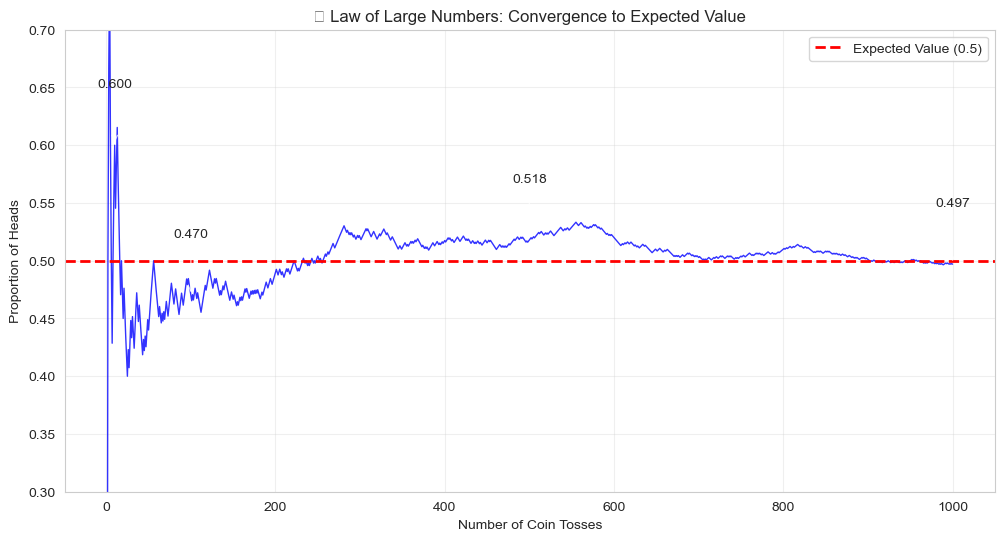

Final proportion after 1000 tosses: 0.497000
Distance from 0.5: 0.003000


In [12]:
# Visualize convergence over many trials
def plot_convergence(max_trials=1000):
    """Show how sample average converges to expected value"""
    np.random.seed(42)  # For reproducible results
    
    # Generate many coin tosses
    tosses = np.random.binomial(1, 0.5, max_trials)
    
    # Calculate running averages
    running_averages = np.cumsum(tosses) / np.arange(1, max_trials + 1)
    
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, max_trials + 1), running_averages, 'b-', alpha=0.8, linewidth=1)
    plt.axhline(y=0.5, color='red', linestyle='--', linewidth=2, 
               label='Expected Value (0.5)')
    
    plt.xlabel('Number of Coin Tosses')
    plt.ylabel('Proportion of Heads')
    plt.title('🪙 Law of Large Numbers: Convergence to Expected Value')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.ylim(0.3, 0.7)
    
    # Add annotations for key points
    checkpoints = [10, 100, 500, 1000]
    for checkpoint in checkpoints:
        if checkpoint <= max_trials:
            value = running_averages[checkpoint-1]
            plt.annotate(f'{value:.3f}', 
                        xy=(checkpoint, value), 
                        xytext=(checkpoint, value + 0.05),
                        arrowprops=dict(arrowstyle='->', alpha=0.7),
                        fontsize=10, ha='center')
    
    plt.show()
    
    print(f"Final proportion after {max_trials} tosses: {running_averages[-1]:.6f}")
    print(f"Distance from 0.5: {abs(running_averages[-1] - 0.5):.6f}")

plot_convergence(1000)

### 3.3 Die Rolling Experiment

In [13]:
# Die rolling function
def die_roll_experiment(n_rolls, show_details=False):
    """Roll a die n times and return the average"""
    rolls = [random.randint(1, 6) for _ in range(n_rolls)]
    
    if show_details:
        print(f"Rolls: {rolls[:20]}{'...' if len(rolls) > 20 else ''}")
    
    return np.mean(rolls)

# Expected value for a fair 6-sided die
expected_die_value = (1 + 2 + 3 + 4 + 5 + 6) / 6

print(f"🎲 Die Rolling Experiment:")
print(f"   Expected value: {expected_die_value}")
print(f"   Let's see convergence with different sample sizes...")
print()

# Test with increasing sample sizes
sample_sizes = [10, 50, 100, 500, 1000, 5000]

print("Sample Size | Average Roll | Distance from 3.5")
print("-" * 45)

for n in sample_sizes:
    avg_roll = die_roll_experiment(n)
    distance = abs(avg_roll - expected_die_value)
    
    print(f"    {n:4d}    |     {avg_roll:5.3f}    |      {distance:5.3f}")

print(f"\n🎯 Pattern: Larger samples → closer to expected value (3.5)")

🎲 Die Rolling Experiment:
   Expected value: 3.5
   Let's see convergence with different sample sizes...

Sample Size | Average Roll | Distance from 3.5
---------------------------------------------
      10    |     4.000    |      0.500
      50    |     3.640    |      0.140
     100    |     3.550    |      0.050
     500    |     3.500    |      0.000
    1000    |     3.503    |      0.003
    5000    |     3.477    |      0.023

🎯 Pattern: Larger samples → closer to expected value (3.5)


**Exercise 2 — Stock Price Simulation (medium)**  
Apply the Law of Large Numbers to a business scenario.


In [14]:
# Stock price simulation scenario
# Daily stock returns: mean = 0.05% (positive trend), std = 2%
daily_return_mean = 0.0005  # 0.05%
daily_return_std = 0.02     # 2%

print(f"📈 Stock Return Analysis:")
print(f"   Expected daily return: {daily_return_mean:.4f} ({daily_return_mean*100:.2f}%)")
print(f"   Daily volatility: {daily_return_std:.4f} ({daily_return_std*100:.1f}%)")
print()

# Your tasks:
# 1. Simulate average returns over different time periods (1 day, 1 week, 1 month, 1 year)
# 2. Show how the Law of Large Numbers makes long-term investing more predictable
# 3. Calculate how the average return converges to the expected value

time_periods = {
    '1 day': 1,
    '1 week': 5,
    '1 month': 22,
    '3 months': 66,
    '1 year': 252
}

# Your code here


📈 Stock Return Analysis:
   Expected daily return: 0.0005 (0.05%)
   Daily volatility: 0.0200 (2.0%)



<details>
<summary><b>Solution</b></summary>

```python
# Stock return simulation using Law of Large Numbers
np.random.seed(123)

print("📊 Law of Large Numbers - Stock Return Analysis:")
print("Time Period | Avg Return | Distance from Expected | Volatility")
print("-" * 65)

simulation_results = {}

for period_name, days in time_periods.items():
    # Simulate many periods of this length
    num_simulations = 1000
    period_returns = []
    
    for sim in range(num_simulations):
        # Generate daily returns for this period
        daily_returns = np.random.normal(daily_return_mean, daily_return_std, days)
        period_return = np.mean(daily_returns)  # Average daily return over period
        period_returns.append(period_return)
    
    avg_return = np.mean(period_returns)
    volatility = np.std(period_returns, ddof=1)
    distance = abs(avg_return - daily_return_mean)
    
    simulation_results[period_name] = {
        'avg_return': avg_return,
        'volatility': volatility,
        'distance': distance
    }
    
    print(f"{period_name:>11} | {avg_return:+8.4f} | {distance:12.4f} | {volatility:8.4f}")

print(f"\n💡 Key Insights:")
print(f"   • Longer periods → average returns closer to expected {daily_return_mean:.4f}")
print(f"   • Longer periods → lower volatility of average returns")
print(f"   • Law of Large Numbers makes long-term investing more predictable!")

# Visualize the convergence
plt.figure(figsize=(12, 6))

periods = list(time_periods.keys())
distances = [simulation_results[p]['distance'] for p in periods]
volatilities = [simulation_results[p]['volatility'] for p in periods]

plt.subplot(1, 2, 1)
plt.plot(range(len(periods)), distances, 'bo-', linewidth=2, markersize=8)
plt.title('Convergence to Expected Return')
plt.xlabel('Time Period')
plt.ylabel('Distance from Expected')
plt.xticks(range(len(periods)), periods, rotation=45)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(len(periods)), volatilities, 'ro-', linewidth=2, markersize=8)
plt.title('Decreasing Volatility')
plt.xlabel('Time Period')
plt.ylabel('Volatility of Average Returns')
plt.xticks(range(len(periods)), periods, rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📈 Business Application: This is why 'time in the market beats timing the market'!")
```
</details>

## 4. The Gambler's Fallacy: Common Misconception

In [15]:
# Demonstrate why the Gambler's Fallacy is wrong
def test_independence_after_streaks():
    """Test if outcomes are truly independent after streaks"""
    num_sequences = 50000
    sequence_length = 10
    
    after_5_heads = []
    after_5_tails = []
    
    for _ in range(num_sequences):
        sequence = [random.randint(0, 1) for _ in range(sequence_length)]
        
        # Look for 5 heads in a row
        for i in range(len(sequence) - 5):
            if sequence[i:i+5] == [1, 1, 1, 1, 1]:  # 5 heads
                if i + 5 < len(sequence):  # Next flip exists
                    after_5_heads.append(sequence[i + 5])
        
        # Look for 5 tails in a row
        for i in range(len(sequence) - 5):
            if sequence[i:i+5] == [0, 0, 0, 0, 0]:  # 5 tails
                if i + 5 < len(sequence):  # Next flip exists
                    after_5_tails.append(sequence[i + 5])
    
    return after_5_heads, after_5_tails

# Run the test
after_heads, after_tails = test_independence_after_streaks()

print("🎰 Gambler's Fallacy Test:")
print()

if len(after_heads) > 0:
    heads_prob = np.mean(after_heads)
    print(f"After 5 heads in a row:")
    print(f"   Next flip is heads: {heads_prob:.3f} (sample size: {len(after_heads)})")
    print(f"   Expected if fair: 0.500")
    print(f"   Difference: {abs(heads_prob - 0.5):.3f}")

if len(after_tails) > 0:
    tails_prob = np.mean(after_tails)
    print(f"\nAfter 5 tails in a row:")
    print(f"   Next flip is heads: {tails_prob:.3f} (sample size: {len(after_tails)})")
    print(f"   Expected if fair: 0.500")
    print(f"   Difference: {abs(tails_prob - 0.5):.3f}")

print(f"\n💡 Key Points:")
print(f"   ✅ Each flip is independent - past results don't affect future ones")
print(f"   ❌ WRONG: 'I'm due for heads after many tails'")
print(f"   ✅ RIGHT: 'Each flip has exactly 50% chance regardless of history'")
print(f"   📊 Law of Large Numbers works through accumulation, not 'balancing'")

🎰 Gambler's Fallacy Test:

After 5 heads in a row:
   Next flip is heads: 0.492 (sample size: 7956)
   Expected if fair: 0.500
   Difference: 0.008

After 5 tails in a row:
   Next flip is heads: 0.496 (sample size: 7720)
   Expected if fair: 0.500
   Difference: 0.004

💡 Key Points:
   ✅ Each flip is independent - past results don't affect future ones
   ❌ WRONG: 'I'm due for heads after many tails'
   ✅ RIGHT: 'Each flip has exactly 50% chance regardless of history'
   📊 Law of Large Numbers works through accumulation, not 'balancing'


## 5. Business Applications: Where These Theorems Pay Off

In [16]:
# Real business applications
applications = {
    "📊 Quality Control": {
        "CLT Application": "Sample averages of product measurements follow normal distribution",
        "LLN Application": "Larger samples give more accurate estimates of defect rates",
        "Business Impact": "Reliable control charts and statistical process control"
    },
    "🎯 A/B Testing": {
        "CLT Application": "Conversion rate differences follow normal distribution",
        "LLN Application": "More visitors give more reliable test results",
        "Business Impact": "Confident decisions about website/product changes"
    },
    "📈 Market Research": {
        "CLT Application": "Survey sample means approximate population means normally",
        "LLN Application": "Larger surveys provide more accurate population estimates",
        "Business Impact": "Reliable customer insights with quantified uncertainty"
    },
    "💰 Financial Risk": {
        "CLT Application": "Portfolio returns become more predictable over time",
        "LLN Application": "Long-term averages converge to expected returns",
        "Business Impact": "Better risk assessment and investment strategies"
    }
}

print("💼 Real Business Applications:")
print()

for domain, details in applications.items():
    print(f"{domain}:")
    for key, value in details.items():
        print(f"   {key}: {value}")
    print()

print("🚀 These theorems are the mathematical foundation for data-driven business!")

💼 Real Business Applications:

📊 Quality Control:
   CLT Application: Sample averages of product measurements follow normal distribution
   LLN Application: Larger samples give more accurate estimates of defect rates
   Business Impact: Reliable control charts and statistical process control

🎯 A/B Testing:
   CLT Application: Conversion rate differences follow normal distribution
   LLN Application: More visitors give more reliable test results
   Business Impact: Confident decisions about website/product changes

📈 Market Research:
   CLT Application: Survey sample means approximate population means normally
   LLN Application: Larger surveys provide more accurate population estimates
   Business Impact: Reliable customer insights with quantified uncertainty

💰 Financial Risk:
   CLT Application: Portfolio returns become more predictable over time
   LLN Application: Long-term averages converge to expected returns
   Business Impact: Better risk assessment and investment strategies



## 6. Mini-Challenges
- **M1 (easy):** Create a CLT demonstration with a uniform distribution
- **M2 (medium):** Build a sample size calculator using LLN principles
- **M3 (hard):** Design a complete business simulation showing both theorems in action

In [17]:
# Your turn - try the challenges!
# M1: Test CLT with uniform distribution from 0 to 10
# M2: Calculate required sample sizes for different precision levels
# M3: Create a customer satisfaction monitoring system


<details>
<summary><b>Solutions</b></summary>

```python
# M1 - CLT with Uniform Distribution
print("🎲 M1 - CLT with Uniform Distribution:")

# Create uniform distribution
uniform_data = np.random.uniform(0, 10, 50000)
uniform_df = pd.DataFrame(uniform_data, columns=['values'])

print(f"Uniform distribution: 0 to 10")
print(f"Expected mean: 5.0")
print(f"Actual mean: {uniform_data.mean():.3f}")

# Test CLT with different sample sizes
sample_sizes = [5, 15, 30, 100]
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for i, n in enumerate(sample_sizes):
    sample_means = sample_distribution(n, 5000, "mean", uniform_df)
    
    axes[i].hist(sample_means, bins=30, density=True, alpha=0.7, color=f'C{i}')
    
    # Normal overlay
    x = np.linspace(sample_means.min(), sample_means.max(), 100)
    normal_fit = stats.norm.pdf(x, np.mean(sample_means), np.std(sample_means))
    axes[i].plot(x, normal_fit, 'red', linewidth=2)
    
    axes[i].set_title(f'n = {n}')
    axes[i].grid(True, alpha=0.3)

plt.suptitle('CLT with Uniform Distribution')
plt.tight_layout()
plt.show()

# M2 - Sample Size Calculator
def sample_size_calculator(population_std, desired_margin, confidence_level=0.95):
    """Calculate required sample size for desired precision"""
    z_scores = {0.90: 1.645, 0.95: 1.96, 0.99: 2.576}
    z = z_scores[confidence_level]
    
    # n = (z * σ / E)²
    n = (z * population_std / desired_margin) ** 2
    return int(np.ceil(n))

print(f"\n📊 M2 - Sample Size Calculator:")
scenarios = [
    ("Customer satisfaction (1-10)", 2.0, 0.2),
    ("Response time (seconds)", 1.5, 0.1),
    ("Revenue per customer ($)", 100, 10)
]

for scenario, std, margin in scenarios:
    n_95 = sample_size_calculator(std, margin, 0.95)
    n_99 = sample_size_calculator(std, margin, 0.99)
    
    print(f"\n{scenario}:")
    print(f"   For ±{margin} precision: {n_95} (95% conf), {n_99} (99% conf)")

# M3 - Complete Business Simulation
class CustomerSatisfactionMonitor:
    def __init__(self, true_satisfaction=7.5, std_dev=1.5):
        self.true_satisfaction = true_satisfaction
        self.std_dev = std_dev
        self.daily_samples = []
        
    def collect_daily_sample(self, sample_size=50):
        """Collect daily customer satisfaction sample"""
        daily_scores = np.random.normal(self.true_satisfaction, self.std_dev, sample_size)
        daily_scores = np.clip(daily_scores, 1, 10)  # Keep in 1-10 range
        daily_mean = np.mean(daily_scores)
        self.daily_samples.append(daily_mean)
        return daily_mean
    
    def get_running_average(self):
        """Get current running average (LLN in action)"""
        if self.daily_samples:
            return np.mean(self.daily_samples)
        return None
    
    def get_confidence_interval(self, confidence=0.95):
        """Get confidence interval for current estimate (CLT in action)"""
        if len(self.daily_samples) < 2:
            return None
        
        mean = np.mean(self.daily_samples)
        std_err = np.std(self.daily_samples, ddof=1) / np.sqrt(len(self.daily_samples))
        
        z = 1.96 if confidence == 0.95 else 2.576
        margin = z * std_err
        
        return (mean - margin, mean + margin)

print(f"\n📈 M3 - Customer Satisfaction Monitor:")

# Simulate 30 days of monitoring
monitor = CustomerSatisfactionMonitor(true_satisfaction=7.2, std_dev=1.8)

print(f"True satisfaction: {monitor.true_satisfaction}")
print(f"\nDaily monitoring results:")

for day in range(1, 31):
    daily_score = monitor.collect_daily_sample(50)
    running_avg = monitor.get_running_average()
    
    if day % 10 == 0:  # Report every 10 days
        ci = monitor.get_confidence_interval()
        print(f"Day {day:2d}: Running avg = {running_avg:.3f}, 95% CI = [{ci[0]:.3f}, {ci[1]:.3f}]")

final_avg = monitor.get_running_average()
final_ci = monitor.get_confidence_interval()
error = abs(final_avg - monitor.true_satisfaction)

print(f"\nFinal Results after 30 days:")
print(f"   Estimated satisfaction: {final_avg:.3f}")
print(f"   True satisfaction: {monitor.true_satisfaction}")
print(f"   Error: {error:.3f}")
print(f"   95% Confidence interval: [{final_ci[0]:.3f}, {final_ci[1]:.3f}]")
print(f"   True value in CI: {'✅ Yes' if final_ci[0] <= monitor.true_satisfaction <= final_ci[1] else '❌ No'}")

print(f"\n🎯 Both theorems working together:")
print(f"   • LLN: Our estimate gets closer to truth with more data")
print(f"   • CLT: We can quantify uncertainty with confidence intervals")
```
</details>

## Wrap-Up & Key Takeaways
✅ You understand the Central Limit Theorem - the foundation of statistical inference  
✅ You've seen CLT work with ANY distribution (exponential, uniform, weird shapes)  
✅ You understand the Law of Large Numbers and why sample size matters  
✅ You can avoid the Gambler's Fallacy trap  
✅ You know how these theorems power real business applications  

**Quick Reference Card:**
- 🎪 **CLT**: Sample means become normal regardless of original distribution
- 📏 **LLN**: Sample averages approach population mean as n increases
- 🎯 **Magic Number**: n ≥ 30 usually sufficient for CLT
- 📊 **Standard Error**: σ/√n (precision increases with sample size)
- 🚫 **Independence**: Each trial is independent (no Gambler's Fallacy!)

**Mathematical Foundations Mastered:**
- Central Limit Theorem enables confidence intervals and hypothesis testing
- Law of Large Numbers justifies using samples to estimate populations
- Together, they make statistical inference possible!

**Next Steps:** Apply these theorems to hypothesis testing, confidence intervals, and advanced statistical methods!
